In [3]:
import torch
import matplotlib.pyplot as plt

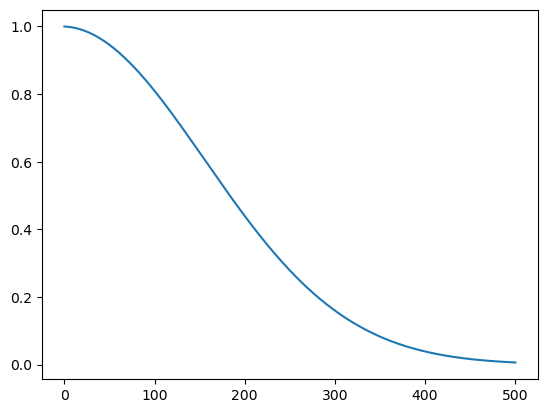

In [33]:
device = torch.device("cuda:0" if torch.cuda.is_available() else torch.device('cpu'))

time_steps = 500
beta1 = 1e-4
beta2 = 0.02
b_t = (beta2 - beta1) * torch.linspace(0, 1, time_steps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()
ab_t[0] = 1

plt.plot(ab_t.to('cpu'))
plt.show()

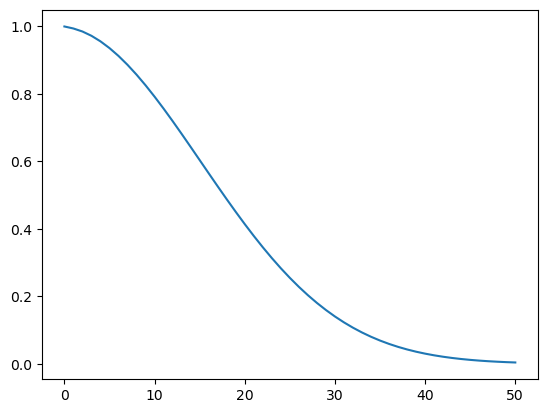

In [46]:

time_steps = 50
beta1 = 1e-4*10
beta2 = 0.02*10
b_t = (beta2 - beta1) * torch.linspace(0, 1, time_steps + 1, device=device) + beta1
a_t = 1 - b_t
ab_t = torch.cumsum(a_t.log(), dim=0).exp()
ab_t[0] = 1

plt.plot(ab_t.to('cpu'))
plt.show()


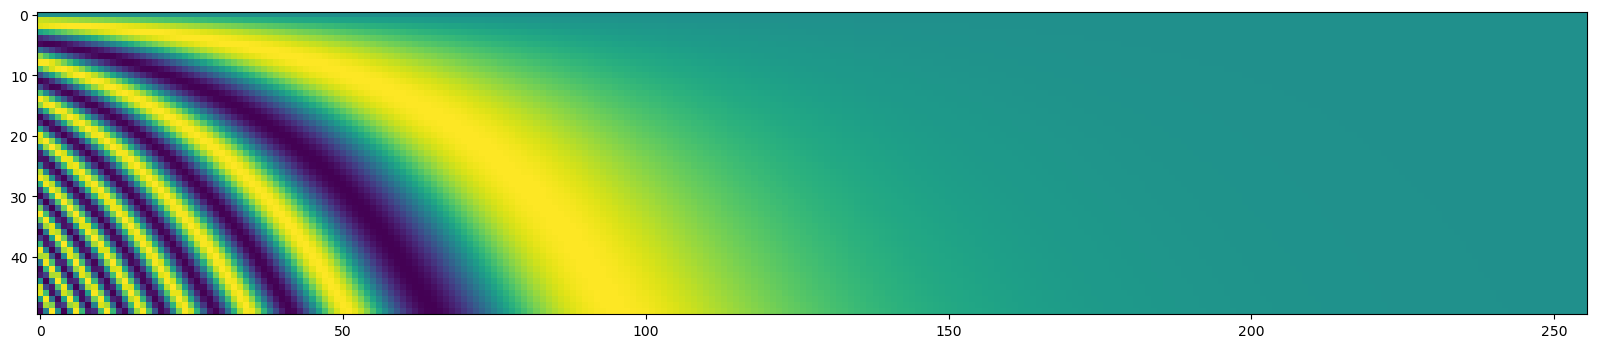

In [48]:
import math
time = torch.arange(0,time_steps)
device = time.device
half_dim = 512 // 2
embeddings = math.log(10000) / (half_dim - 1)
embeddings = torch.exp(torch.arange(half_dim, device=device) * -embeddings)
embeddings = time[:, None] * embeddings[None, :]
embeddings = torch.cat((embeddings.sin(), embeddings.cos()), dim=-1)

plt.figure(figsize=[20,20])
plt.imshow(embeddings[:,:half_dim].to('cpu'))
#plt.xlim(0,10)
plt.show()
